<a id="top" style="float:right;" href="http://dynfluid.ensam.eu/"><img style="height:120px;" src="http://dynfluid.ensam.eu/uas/DYNFLUID/logoPrincipal/Logo-DynFluid-Web.png"/></a>
<a style="float:left;" href="http://www.cnam.fr//"><img style="height:120px;" src="https://upload.wikimedia.org/wikipedia/commons/4/45/Logo_ENSTA_Paris.jpg"></a>

<center>
<h3 style="color:#888888;"> <i>--  Introduction   la méthode de Boltzmann sur Réseau  --</i> </h3>
<h1> TP n°2 </h1>
<h3> La cavité entrainée </h3>

<h6><a href="mailto:simon.marie@lecnam.net">simon.marie@lecnam.net</a></h6>
</center>

<h1> 1 - Préambule </h1>

Le TP doit être réalisé en binôme ou individuellement et doit être rendu sous la forme d'un Notebook jupyter en respectant la nomenclature suivante:
<center>
<b>TP1_NOM1_NOM2.ipynb</b>
</center>

Tous les résultats, discussions, analyses, doivent donc être inclus dans le fichier.

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import HTML, display
from IPython.display import Image

fs=15
# plt.style.use('seaborn-dark')
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)
%matplotlib inline

<h1> 2 - Présentation du TP</h1>

On se propose dans ce TP de simuler numériquement l'écoulement induit par viscosité dans une cavité de section carré. Pour pouvoir simuler les phénomênes visqueux, il est nécessssaire d'utiliser la quadrature d'ordre 3 et donc le réseau $D2Q9$.

<h2>Le modèle D2Q9</h2>

Le modèle à 9 vitesses de la méthode de Boltzmann sur reseau assure l'égalitité des moments jusqu'à  l'ordre 2 et permet donc la simulation des écoulements visqueux régit par les équations de Navier-Stokes avec une limitation en nombre de Mach.
Les parametres du modele sont resumees dans le tableau suivant:

<table style="width:800px;text-align:center;">
<tr><td>$\widehat{c_\alpha}$</td><td>$\omega_\alpha$</td><td>$\widehat{c_0}$</td><td>$\tau_g$</td></tr>
<tr><td>$(0,0)\\ (1,0) (0,1) (-1,0) (0,-1)\\ (1,1) (-1,1) (-1,-1) (1,-1)$</td><td>$\dfrac{4}{9},\\ \dfrac{1}{9},\dfrac{1}{9},\dfrac{1}{9},\dfrac{1}{9},\\ \dfrac{1}{36},\dfrac{1}{36},\dfrac{1}{36},\dfrac{1}{36}$</td><td>$\dfrac{1}{\sqrt{3}}$</td><td width=30%>$\dfrac{1}{2}+\dfrac{\tilde{\nu}}{\widehat{c_0}^2}$</td></tr>
</table>

La fonction d'équilibre du module s'écrit à l'ordre 2:
$$
\displaystyle{g_{\alpha}^{eq}=\rho\omega_\alpha\left(1+\dfrac{c_{\alpha,i}u_i}{c_0^2}+\dfrac{(c_{\alpha,i}u_i)^2}{2c_0^4}-\dfrac{u_i^2}{2c_0^2}\right)}
$$

et son algorithme général:
<code>Collision</code>
$$
\displaystyle{g_{\alpha}^{coll}} = g_{\alpha}-\dfrac{1}{\tau_g}[g_{\alpha}-g_{\alpha}^{eq}]\\
$$

et <code>propagation</code>:
$$
g_{\alpha}(x,y) = g_{\alpha}^{coll}(x-c_{\alpha,x},y-c_{\alpha,y})
$$

Les variables macroscopiques sont calculées à  partir des moments des fonctions de distribution:
$$
\rho=\sum_{\alpha=1}^9 g_{\alpha}
$$

$$
\rho u_x=\sum_{\alpha=1}^9 c_{\alpha,x}g_{\alpha}
$$

$$
\rho u_y=\sum_{\alpha=1}^9 c_{\alpha,y}g_{\alpha}
$$


<h2>La cavité entraînée</h2>

L'écoulement dans une cavité entrainée consite a imposer une vitesse $U_0$ constante sur le bord supérieur d'une cavité de largeur $L$ et de hauteur $L$. Le nombre de Reynolds de cet écoulement est basé sur la largeur $L$ et la vitesse d'entrainement $U_0$:
$$
Re=\dfrac{U_0 L}{\nu}=\dfrac{\tilde{U_0} \tilde{L}}{\tilde{\nu}}
$$

<center>
<img src="https://hpp.education/Lessons/LBM/ENSTA/LDCavity.png" style="width:650px;"/>
    <b><i>Figure 1: Géométrie du domaine de calcul</i></b>
</center>

Dans ce TP nous allons nous focaliser sur les solutions stationnaires de cet écoulement pour des nombres de Reynolds compris entre 100 et 1000.

<h1> 3 - Travail demandé</h1>
<h2>Définition des paramêtres et des fonctions</h2>

Pour les paramêtres du calcul, on prendra un domaine unitaire $(L_x, L_y)=(1,1)$ de résolution $(n_x,n_y)=(50,50)$ mailles (on fera varier la résolution pour les dernières questions). On souhaite réaliser plusieurs simulations en faisant varier le nombre de Reynolds. Le nombre de Mach sera fixé à  $M_0=0.2$.

<b style="color:#0055FA">1. Completer la cellule suivante à  partir des données fournies et des définition du cours.</b>

Dans ce cas, la fonction de distribution à l'équilibre s'écrit:

$$
\displaystyle{g_{\alpha}^{eq}=\rho\omega_\alpha\left(1+\dfrac{c_{\alpha,x}u_x}{c_0^2}+\dfrac{(c_{\alpha,i}u_x)^2}{2c_0^4}-\dfrac{u_x^2}{2c_0^2}\right)}
$$
avec $u_x(t,x,y) = U_0$ si $y = L_y$, $0$ sinon.

Comme $c_0 = \frac{1}{\sqrt{3}}$, on a alors la relation semi-analytique:
$$
\displaystyle{g_{\alpha}^{eq}=\rho\omega_\alpha\left(1+3c_{\alpha,x}u_x+\dfrac{9}{2}(c_{\alpha,x}u_x)^2-3\dfrac{u_x^2}{2}\right)}
$$


Définition d'un paramètre

In [4]:
ca= [(0,0),(0,1),(1,0),(0,-1),(-1,0),(1,1),(1,-1),(-1,-1),(-1,1)] #nodes

w=[4/9,1/9,1/9,1/9,1/9,1/36,1/36,1/36,1/36,1/36] #Weights of the quadrature

c0=1/np.sqrt(3) #Normalized celerity sound of the lattice

# Domaine
nx=50
ny=50

# Taille de maille:
dx=1/50

# Vitesse du son réelle à  293K:
c0_real=330

# Pas de temps:
dt=dx/c0_real*c0

# Mach:
M0=0.2
U0 = M0*c0

<b style="color:#0055FA">2. Complêter chacune des fonctions suivantes correspondant aux étapes de l'algorithme</b>
    
<b>Initialisation:</b> Définir la fonction permettant d'initialiser le domaine à  une densité uniforme $\rho=1$, à  vitesse nulle dans la cavité et à  la vitesse $U_0$ sur le bord supérieur. Calculer également le paramétre de relaxation $\tau_g$ en fonction du nombre de Reynolds souhaité:

In [5]:
def init(M0, Re):
    """
    M0 is the Mach number and Re the Reynolds number.
    Initializes the distribution function, volume density and velocity.
    """
    # Initialisation du domaine
    rho = np.ones((nx,ny))
    geq = np.zeros((9,nx,ny))
    ux = np.zeros((nx,ny))
    uy = np.zeros((nx,ny))

    U0 = M0*c0 #U0 adimensionné -------------------------------
    nu = U0*nx/Re #Viscosity
    ux[0] = U0
    taug=1/2 + nu/c0**2

    for i in range(9):
        geq[i]=w[i]*(1 + 3*ca[i][1]*ux + 4.5*(ca[i][1]*ux)**2 - 1.5*ux**2)
    return geq, rho, ux, uy, taug, U0

<b>Equilibre:</b>  Dans ce TP nous avons besoin de calculer explicitement les fonctions de distribution à l'équilibre. Définir la fonction permettant la mise à  jour de ces distributions en fonction des moments $\rho$, $u_x$ et $u_y$.

In [6]:
def eq(rho, ux, uy, geq):
    # Mise à  jour de geq
    for i in range(9):
        geq[i] = w[i]*rho*(1 + 3*(ca[i][1]*ux + ca[i][0]*uy) + 9/2*(ca[i][1]*ux + ca[i][0]*uy)**2 - 3/2*(ux**2 + uy**2))

<b>Collision:</b>  Ecrire simplement l'étape de collision:

In [7]:
def collide(geq: np.array, g: np.array, taug: int):
    # Etape de collision
    gcoll = g - 1/taug*(g - geq)
    return gcoll

<b>Propagation:</b> Pour cette étape on pourra utiliser du slicing plutôt qu'une boucle sur l'espace.

In [111]:
def propagate(g, gcoll):
  """
  Propagate the distribution function. DO NOT pay attention to boundary conditions for now.
  """
  g[0] = gcoll[0]

  gcoll_shift_r = np.roll(gcoll[1], 1, axis = 1)
  gcoll_shift_r[:,0] = g[1,:,0]
  gcoll_shift_l = np.roll(gcoll[3], -1, axis = 1)
  gcoll_shift_l[:,-1] = g[3,:,-1]
  # Etape de propagation
  g[1] = gcoll_shift_r
  g[3] = gcoll_shift_l

  gcoll_shift_r = np.roll(gcoll[2], -1, axis = 0)
  gcoll_shift_r[-1] = g[2,-1]
  gcoll_shift_l = np.roll(gcoll[4], 1, axis = 0)
  gcoll_shift_l[0] = g[4,0]
  # Etape de propagation
  g[2] = gcoll_shift_r
  g[4] = gcoll_shift_l

  tmp = np.array(g[5,-1], copy = True)
  tmp2 = np.array(g[5,:,0], copy = True)
  g[5] = np.roll(gcoll[5], (-1,1), axis = (0,1))
  g[5,-1] = tmp
  g[5,:,0] = tmp2

  tmp = np.array(g[6,-1], copy = True)
  tmp2 = np.array(g[6,:,-1], copy = True)
  g[6] = np.roll(gcoll[6], (-1,-1), axis = (0,1))
  g[6,-1] = tmp
  g[6,:,-1] = tmp2

  tmp = np.array(g[7,0], copy = True)
  tmp2 = np.array(g[7,:,-1], copy = True)
  g[7] = np.roll(gcoll[7], (1,-1), axis = (0,1))
  g[7,0] = tmp
  g[7,:,-1] = tmp2

  tmp = np.array(g[8,0], copy = True)
  tmp2 = np.array(g[8,:,0], copy = True)
  g[8] = np.roll(gcoll[8], (1,1), axis = (0,1))
  g[8,0] = tmp
  g[8,:,0] = tmp2

In [102]:
def propagate(g,gcoll):
    # Etape de propagation
    g[0] = gcoll[0]
    g[1,:,1:] = gcoll[1,:,:-1] #OK
    g[2,:-1,:] = gcoll[2,1:,:] #OK
    g[3,:,:-1] = gcoll[3,:,1:] #OK
    g[4,1:,:] = gcoll[4,:-1,:] #OK
    g[5,:-1,1:] = gcoll[5,1:,:-1] #OK
    g[6,:-1,:-1] = gcoll[6,1:,1:] #OK
    g[7,1:,:-1] = gcoll[7,:-1,1:] #OK
    g[8,1:,1:] = gcoll[8,:-1,:-1] #OK

<b>Calcul des moments:</b> Calcul les variables macroscopiques $\rho$,$u_x$,$u_y$ dans le modèle $D2Q9$.

Dans ce modèle,
\begin{equation}
\left\{
\begin{array}{l}
\rho = g_1 + g_2 + g_3 + g_4 + g_5 + g_6 + g_7 + g_8 + g_9,\\
\rho u_x = g_1 - g_3 + g_5 - g_6 - g_7 + g_8,\\
\rho u_y = g_2 - g_4 + g_5 + g_6 - g_7 - g_8.\\
\end{array}
\right.
\end{equation}

In [10]:
def macro(g,rho,ux,uy):
    # calcul des variables macro
    rho = g[0] + g[1] + g[2] + g[3] + g[4] + g[5] + g[6] + g[7] + g[8]
    ux = (g[1] - g[3] + g[5] - g[6] - g[7] + g[8])/rho
    uy = (g[2] - g[4] + g[5] + g[6] - g[7] - g[8])/rho

<b>Condition aux limites solide:</b> Définir la fonction permettant de mettre à  jour les distributions inconnues sur les parois solides. On utilisera ici la technique du Bounce-Back présentée dans le cours:

Cette technique consiste à supposer que la collision avec la paroi se résume à un rebond avec du frottement.

En reprenant l'illustration du cours:

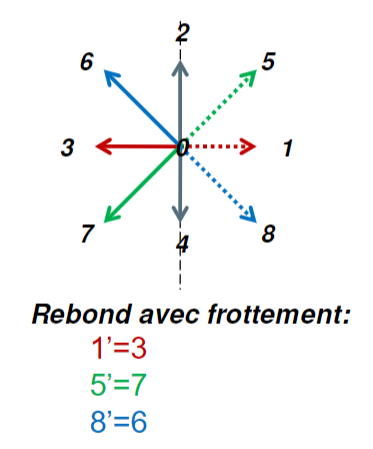

In [13]:
Image("/content/CL.PNG", width = 300, height = 300)

In [ ]:
def macro(g,rho,ux,uy):
    # calcul des variables macro
    rho[:,:] = g[0] + g[1] + g[2] + g[3] + g[4] + g[5] + g[6] + g[7] + g[8]
    ux[:,:] = (g[1] - g[3] + g[5] - g[6] - g[7] + g[8])/rho
    uy[:,:] = (g[2] - g[4] + g[5] + g[6] - g[7] - g[8])/rho

In [14]:
def wall(gcoll, g, mask):
    # Paroi solide sur les bords latéraux et inférieur: Bounce back
    g[1, mask==1], g[3, mask==1] = gcoll[3, mask==1], gcoll[1, mask==1]
    g[2, mask==1], g[4, mask==1] = gcoll[4, mask==1], gcoll[2, mask==1]
    g[6, mask==1], g[8, mask==1] = gcoll[8, mask==1], gcoll[6, mask==1]
    g[7, mask==1], g[5, mask==1] = gcoll[5, mask==1], gcoll[7, mask==1]

<b>Condition aux limites fluide:</b> Définir la fonction permettant de mettre à  jour les moments $u_x, \rho_{top}$ et les distributions inconnues sur le bord supérieur. On utilisera les approches vues dans le cours pour le bounce-back hors équilibre:

$$
g_\alpha-g_\alpha^{eq}=g_\overline{\alpha}-g_\overline{\alpha}^{eq}
$$

Ici $\overline{\alpha}$ désigne la vitesse opposée à la vitesse $\alpha$.
De l'illustration ci-dessus, on observe que $\bar{1} = 3, \bar{2} = 4, \bar{5} = 7, \bar{6} = 8$. On en déduit bien entendu que réciproquement $\bar{3} = 1, \bar{4} = 2, \bar{7} = 5, \bar{8} = 6$.

Rappelons que l'on a ici $c_0 = \frac{1}{\sqrt{3}}$.

En identifiant les distributions inconnues sur le bord supérieur, simplifier l'expression ci-dessus en fonction des moments connu sur le bord supérieur.
Les inconnues sont $g_4, g_7$ et $g_8$.
___
$g_\alpha = g_{\alpha}^{eq} + g_\overline{\alpha}-g_\overline{\alpha}^{eq}$

$g_\alpha = \rho\omega_\alpha\left(1+\dfrac{c_{\alpha,i}u_i}{c_0^2}+\dfrac{(c_{\alpha,i}u_i)^2}{2c_0^4}-\dfrac{u_i^2}{2c_0^2}\right) +  g_\overline{\alpha} - \rho\omega_\overline{\alpha}\left(1+\dfrac{c_{\overline{\alpha},i}u_i}{c_0^2}+\dfrac{(c_{\overline{\alpha},i}u_i)^2}{2c_0^4}-\dfrac{u_i^2}{2c_0^2}\right)$
\
Or, $\omega_{\alpha} = \omega_{\overline{\alpha}}$ et $c_{\overline{\alpha}} = - c_{\alpha}$. C'est une propriété de la quadrature de Gauss-Hermite.
\
$g_\alpha = g_\overline{\alpha} + 6\rho\omega_{\alpha}c_{\alpha,i}u_{i}$

En particulier,

$g_4 = g_2 - 6\rho/9 u_y = g_2 - \frac{2}{3}\rho u_y$

$g_7 = g_5 - 6\rho/36 (u_y + u_x) = g_5 - \frac{1}{6}\rho (u_y + u_x),$

$g_8 = g_6 + 6\rho/36 (u_x - u_y) = g_6 + \frac{1}{6}\rho(u_x - u_y).$

Même si $u_x = U_0$ est imposé, il est important de comprendre que $u_y$ reste un degré de liberté, et n'est pas à priori nul.

On implémentera donc:

$g_4 = g_2 - 6\rho/9 u_y = g_2 - \frac{2}{3}\rho u_y$

$g_7 = g_5 - 6\rho/36 (u_y + u_x) = g_5 - \frac{1}{6}\rho (u_y + u_x),$

$g_8 = g_6 + 6\rho/36 (u_x - u_y) = g_6 + \frac{1}{6}\rho(u_x - u_y).$

\begin{equation}
\left\{
\begin{array}{l}
g_4 = g_2 - \frac{2}{3}\rho u_y,\\
g_7 = g_5 - \frac{1}{6}\rho (u_y + U_0),\\
g_8 = g_6 + \frac{1}{6}\rho(U_0 - u_y).
\end{array}
\right.
\end{equation}
On a toujours un problème cependant, on ne connaît pas $\rho$ sur la couche supérieure. Pour fermer le système, on a besoin d'une équation supplémentaire.
___


Exprimer la densité sur le bord supérieur $\rho_{top}$ en fonction des distributions connues et de la vitesse

___
On se place en $y = L$. On a en toute généralité:

$\rho(x,L) = \rho_{\text{top}} = \sum\limits_{\alpha}g_\alpha = g_0 + g_1 + g_2 + g_3 + g_4 + g_5 + g_6 + g_7 + g_8$. On a le même problème que ci-dessus, on ne connait pas $g_4$, $g_7$ et $g_8$ sans connaître $\rho$ en amont. L'astuce est d'utiliser que:
$$
\rho u_y = g_2 + g_5 + g_6 - (g_4 + g_7 + g_8),
$$
ou autrement dit,
$$
g_4 + g_7 + g_8 = g_2 + g_5 + g_6 - \rho u_y.
$$
En injectant dans $\rho_{\text{top}}$, on obtient:
$$
\rho_{\text{top}}=\dfrac{1}{1 + U_{y}}(g_0 + g_1 + g_3 + 2(g_6 + g_2 + g_5)).
$$
Résultat que l'on pourrait décoder comme:
$\rho_{\text{top}}=\dfrac{1}{1 + U_{y}}(\displaystyle{2\sum g_{\alpha_{k}}  + \sum g_{\alpha_{t}}})$, où les $\alpha_{k}$ désignent les coefficients dont les vitesses $c_{\alpha_{k}}$ sont parallèles avec $\vec{U_{y}}$ et $c_{\alpha_{t}}$ les coefficients perpendiculaires à ce vecteur.

___

In [103]:
def lid(g,rho,ux,uy):
    # Conditions de vitesse au bord superieur
    ux[0]= U0
    # Macro: On impose ux et on en déduit rho_w:
    rho[0]=1/(1 + uy[0])*(g[0,0] + g[1,0] + g[3,0] + 2*(g[2,0] + g[5,0] + g[6,0]))

    # Distributions: On impose les distributions inconnues avec le Bounce-Back hors equilibre
    g[4,0] = g[2,0] - 6*rho[0]*w[4]*uy[0]
    g[7,0] = g[5,0] - 6*rho[0]*w[7]*(uy[0] + U0)
    g[8,0] = g[6,0] + 6*rho[0]*w[8]*(U0 - uy[0])

<h2>Calcul</h2>

<b style="color:#0055FA">3. Une fois les parametres et les fonctions définis, fixer le nombre de Reynolds (on commencera par $Re=100$), initialiser les distributions à  leur valeur d'équilibre puis définir les mailles concernées par une condition aux limites solide.</b> Pour cela on pourra utiliser une variable de type *mask* de la même taille que le domaine et valant 0 pour une maille fluide et 1 pour une maille solide.

In [16]:
# Nombre de Reynolds:
Re = 10

# initialisation:
geq, rho, ux, uy, taug, U0 = init(M0, Re)
g, gcoll= geq.copy(), geq.copy() #Deep copy
# Marquage des conditions aux limites:
# Fluide: mask=0
# Solide: mask=1
mask=np.zeros((nx,ny));
mask[1:,0] = 1 # left
mask[1:,-1] = 1 # right
mask[-1,:] = 1 # bottom

On recherche une solution stationnaire pour les paramètres choisis, c'est à  dire une solution dont les quantités n'évoluent plus au cours du temps. Il faut donc utiliser une boucle *while* basée sur un critère d'arrêt.
    
<b style="color:#0055FA">4. Définir une boucle de calcul reprenant l'ensemble des fonctions de la question 2. et basée sur la convergence de l'énergie cinétique moyenne dans la cavité:</b>
    
$$
\displaystyle{E_c=\dfrac{1}{V}\int_\mathcal{V}\rho\left(\dfrac{u_x^2}{U_0^2}+\dfrac{u_y^2}{U_0^2} \right) d\mathcal{V}}
$$

On prendra comme critère de convergence $\epsilon=\left|Ec^{n+1}-Ec^{n} \right|<10^{-5}$

In [112]:
# Nombre de Reynolds:
Re=[10,100,500,1000,1500,2000]
# Re = [100]

Ux = []
Uy = []
Rho = []

for re in Re:
  # initialisation:
  geq, rho, ux, uy, taug, U0=init(M0,re)
  g,gcoll=geq.copy(),geq.copy()
  Ec1=0
  eps=1
  nt=0
  start=time.time()

  while (eps>1e-6 and nt<3000):
      nt+=1
      gcoll = collide(geq, g, taug) # Update gcoll
      propagate(g, gcoll) # Propagate
      wall(gcoll,g,mask) # Conditions aux murs
      lid(g,rho,ux,uy) # Condition au couvercle
      macro(g,rho,ux,uy) # Calcul des moments
      eq(rho,ux,uy,geq) # Calcul de feq
      Ec2 = 1/(nx*ny)*np.sum(rho*((ux/(U0))**2 + (uy/(U0))**2))
      eps = abs(Ec2 - Ec1)
      Ec1 = Ec2
  tcal=time.time()-start
  print(str(nt)+" itérations en "+str(tcal)+"s: Performances: "+str(10**(-6)*nt*50*50/tcal)+" MLUPS")
  Ux += [ux]
  Uy += [uy]
  Rho += [rho]

490 itérations en 0.522599458694458s: Performances: 2.344051413792616 MLUPS
2612 itérations en 2.7502458095550537s: Performances: 2.374333224075142 MLUPS
3000 itérations en 3.094244956970215s: Performances: 2.423854641212297 MLUPS
3000 itérations en 4.203598976135254s: Performances: 1.784185418870623 MLUPS
770 itérations en 0.7972774505615234s: Performances: 2.414466881816638 MLUPS
450 itérations en 0.45540904998779297s: Performances: 2.47030663977836 MLUPS


<h2>Analyse des résultats</h2>

<b style="color:#0055FA">5. Comparer les performances du code obtenu à  celles du TP1. Commenter</b>

____
La taille du domaine étant bien plus petite, le MPLUPS est aussi bien plus faible, on le retrouve à environ 0.5.

____


<b style="color:#0055FA">6. Tracer les lignes de courant de l'écoulement et commenter la figure obtenue. (On pourra utiliser la fonction <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html">streamplot</a>)</b>

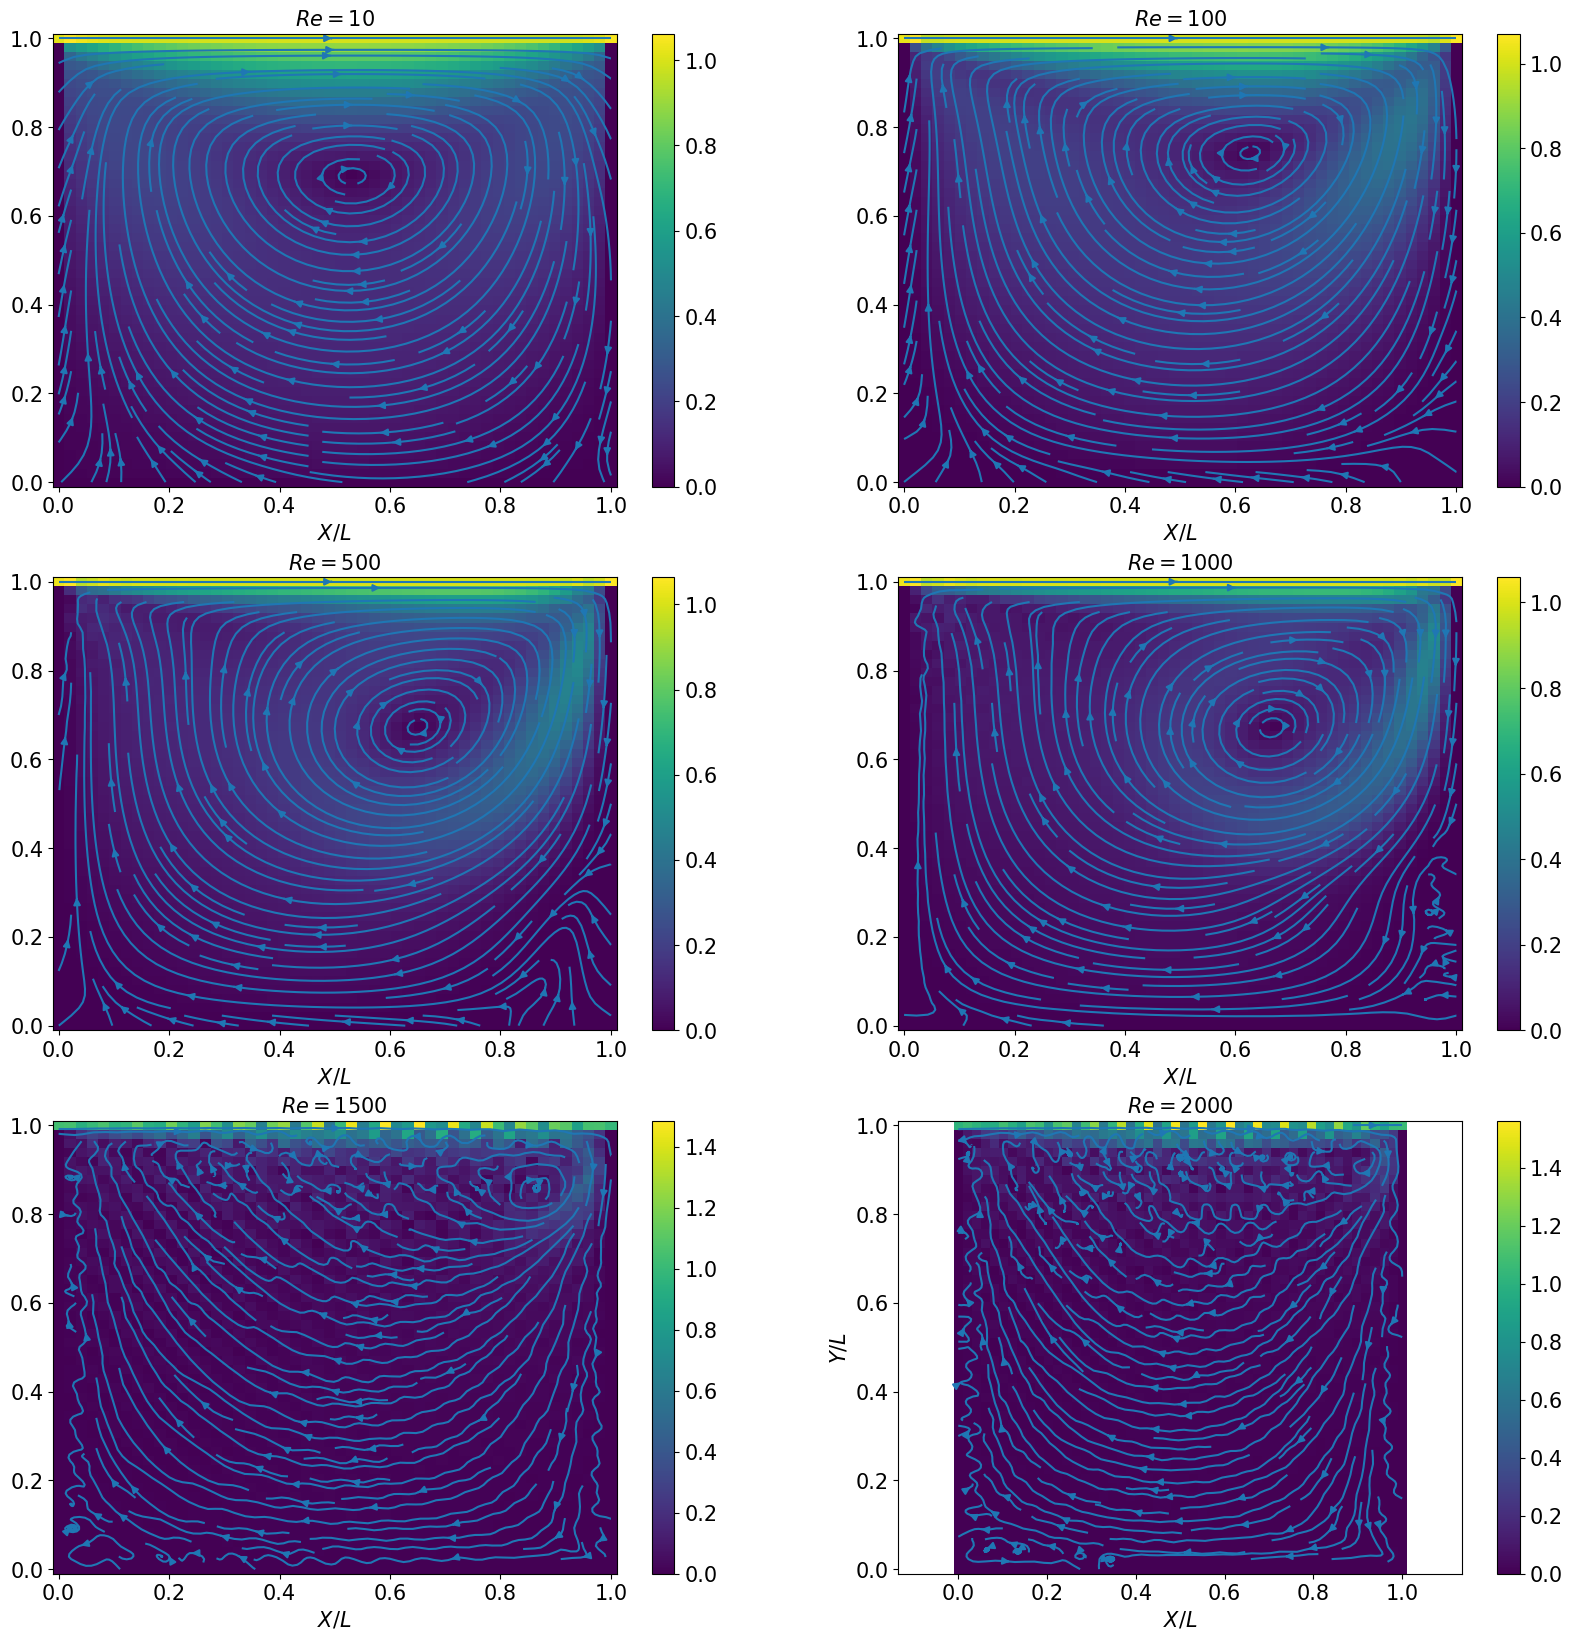

In [113]:
fig, ax = plt.subplots(3,2, figsize = (20,20))
x = np.linspace(0,1,num=nx)
y = np.linspace(0,1,num=ny)
for i in range(6):
  ax_i = ax[i//2,i%2]
  cm = ax_i.pcolormesh(x, y, np.sqrt((Ux[i][::-1]**2 + Uy[i][::-1]**2)/U0**2), cmap = 'viridis')
  plt.colorbar(cm, ax = ax_i)
  ax_i.streamplot(x,y,Ux[i][::-1], Uy[i][::-1], cmap = 'viridis', density = 1.5)
  ax_i.set_xlabel(r'$X/L$',fontsize=fs);plt.ylabel(r'$Y/L$',fontsize=fs)
  ax_i.set_title(r'$Re='+str(Re[i])+'$',fontsize=fs);plt.axis('equal');

Les fichiers **Ghia82data_ux.csv** et **Ghia82data_uy.csv** contiennent des résultats de référence  enregistrés le long des lignes $x=L/2$ et $y=L/2$ respectivement. Les fichiers sont constitués de plusieurs colonnes. La première correspond à  la coordonnée du point de mesure et les autres aux différentes valeurs de Reynolds:

<table>
    <th>$x/y$</th><th>$u_{x/y}$ $Re=100$</th><th>$u_{x/y}$ $Re=400$</th><th>$u_{x/y}$ $Re=1000$</th><th>$u_{x/y}$ $Re=3200$</th><th>$u_{x/y}$ $Re=5000$</th><th>$u_{x/y}$ $Re=7500$</th><th>$u_{x/y}$ $Re=10000$</th>
    </table>
    
Les grandeurs de vitesse sont normalisées par la vitesse d'entrainement $U_0$.

In [86]:
Ghia_ux=np.loadtxt('Ghia82data_ux.csv')
Ghia_uy = np.loadtxt('Ghia82data_uy.csv')

In [94]:
ux = Ux[1]
uy = -Uy[1]
rho = Rho[1]

<b style="color:#0055FA">7. Comparer les profils obtenus pour $u_x$ et $u_y$. On pourra faire varier le critère de convergence et commenter son influence sur les résultats.</b>

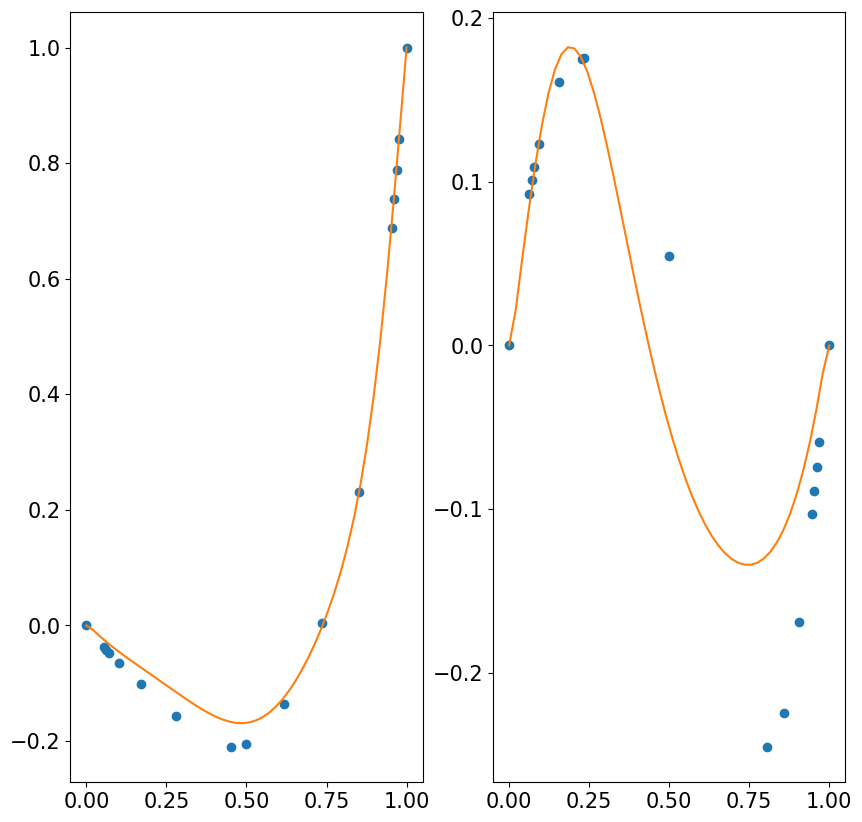

In [95]:
fig=plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(Ghia_ux[1:,0],Ghia_ux[1:,1],'o')
plt.plot(np.linspace(0,1,nx),ux[:,nx//2][::-1]/U0)
plt.subplot(122)
plt.plot(Ghia_uy[1:,0],Ghia_uy[1:,1],'o')
plt.plot(np.linspace(0,1,ny),uy[ny//2,::-1]/U0)

<b style="color:#0055FA">8. Etudier la précision des résultats en fonction du nombre de Mach pour $R_e=100$. Commenter </b>

**Commentaires**

___


___

<b style="color:#0055FA">8. Compléter le tableau suivant en indiquand le nombre d'itération nécessaire à  la convergence en faisant varier le Reynolds et la résolution. Que constatez-vous pour les faibles résolutions et les hauts Reynolds. Expliquez </b>

Nx\Re | 100 | 400 | 1000 | 3200
 --- | --- | --- | --- | ---
 50 | ? | ? | x | x
100 | ? | ? | x | x
200 | ? | ? | ?  | ?
400 | ? | ? | ?  | ?


**Commentaires**
___


___

# Conclusion

Présenter ici la synthèse de votre TP en décrivant les points importants et les principaux résultats.


In [ ]:
from IPython.core.display import HTML
style=open('notebooks.css', "r").read()
HTML(style)

<a id="top" style="float:right;" href="http://dynfluid.ensam.eu/"><img style="height:120px;" src="http://dynfluid.ensam.eu/uas/DYNFLUID/logoPrincipal/Logo-DynFluid-Web.png"/></a>
<a style="float:left;" href="http://www.cnam.fr//"><img style="height:120px;" src="https://upload.wikimedia.org/wikipedia/commons/4/45/Logo_ENSTA_Paris.jpg"></a>
<center><a href="#top">Retour en haut de la page</a></center>